#link of the data

https://github.com/tanyabajetha/Data_Analysis_Projects/blob/main/Diwali%20Sales%20Data.csv

In [2]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Import csv file data

sales_data=pd.read_csv("Diwali Sales Data.csv")

In [7]:
# Get first five rows of the data

sales_data.head(5)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


## Basic Data Cleaning

In [7]:
#Number of rows and columns in the data

print("No. of rows are:",sales_data.shape[0])
print("No. of columns are:",sales_data.shape[1])

No. of rows are: 11251
No. of columns are: 15


In [9]:
# check datatypes of each columns and how many null value are there.

sales_data.info()

# Amount column have some null values and,
#Status & Unnamed column have complete null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [14]:
# drop Status and Unnamed1 columns beacuse they have no values.

sales_data=sales_data.drop(columns=["Status","unnamed1"])

In [19]:
# re-checking null values again in each column

sales_data.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [29]:
# drop null values in Amount column beacuse there are only 12 null values and removing them won't affect the data.

sales_data=sales_data.dropna(subset="Amount")

In [262]:
# let's check again for null values

sales_data.isna().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Shaadi_Status       0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [46]:
# change the datatype of "Amount" from float to int

sales_data=sales_data.astype({"Amount":'int32'})

In [49]:
# let's check the dtype of "Amount" column
sales_data["Amount"].dtype

dtype('int32')

In [28]:
# Rename the "Marital_Status" column into "Shaadi_Status"

sales_data=sales_data.rename(columns={"Marital_Status":"Shaadi_Status"})

In [29]:
sales_data.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Shaadi_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'Status', 'unnamed1'],
      dtype='object')

In [58]:
# Get the descriptive stats of your data

sales_data.describe()

,User_ID,Age,Shaadi_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


## Exploratory Data Analysis

### Gender

[Text(0, 0, '7842'), Text(0, 0, '3409')]

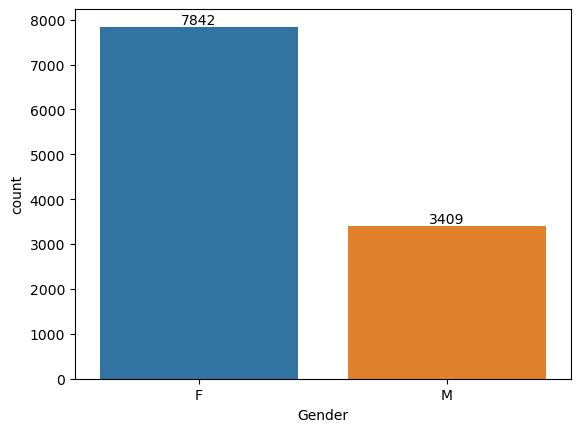

In [8]:
# Which gender is their highest customer

ax=sns.countplot(x="Gender", data=sales_data)
plt.bar_label(ax.containers[0])

There are 7842 females and 3409 males as their customers. Hence, Female is their highest customer.

In [10]:
# Which gender has done maximum shopping

max_shopping=sales_data.groupby(by=["Gender"])["Amount"].sum().sort_values(ascending=False).reset_index()

max_shopping

,Gender,Amount
0,F,74335856.43
1,M,31913276.00


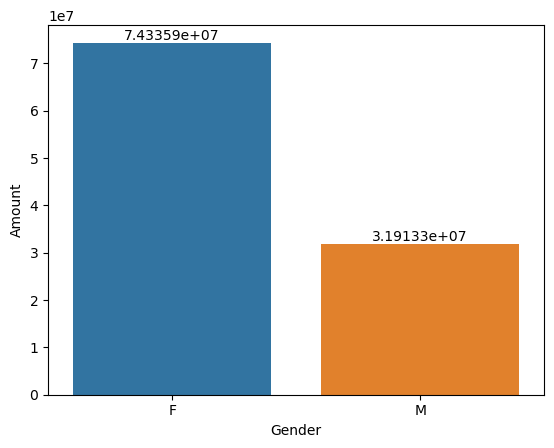

In [11]:
ax=sns.barplot(x="Gender",y="Amount",data=max_shopping)
plt.bar_label(ax.containers[0])
plt.show()

From above two Genderchart we can conclude that most of the buyer are females 
and even their purchasing power is more than the males.

### Age

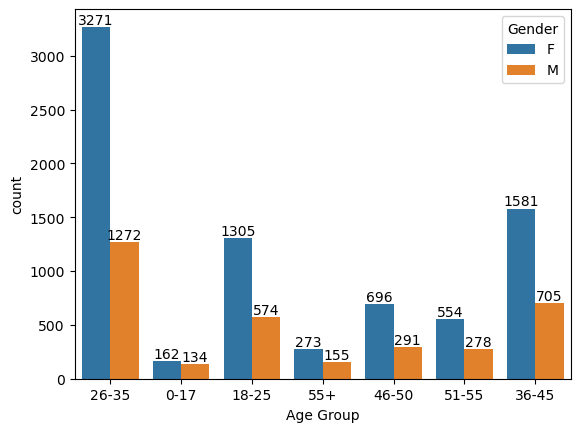

In [17]:
# Count of different age group customers of each gender

ax=sns.countplot(x="Age Group",data=sales_data,hue="Gender")
plt.bar_label(ax.containers[0])
plt.bar_label(ax.containers[1])
plt.show()

In [19]:
# Total sales by each age group

total_shopping=sales_data.groupby(by=["Age Group"])["Amount"].sum().reset_index()

total_shopping

,Age Group,Amount
0,0-17,2699653.00
1,18-25,17240732.00
2,26-35,42613443.94
3,36-45,22144995.49
4,46-50,9207844.00
5,51-55,8261477.00
6,55+,4080987.00


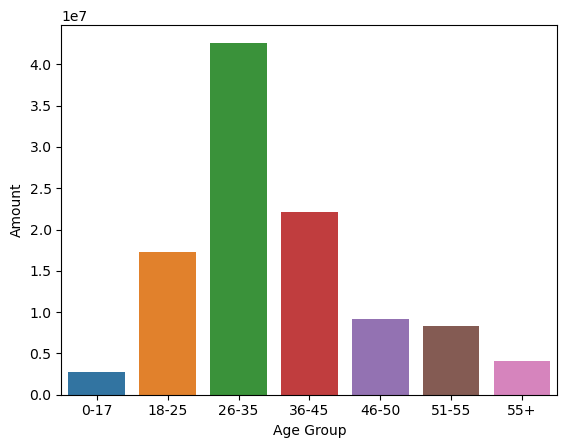

In [21]:
sns.barplot(x="Age Group",y="Amount",data=total_shopping)
plt.show()

From the above two "Age" graphs we can conclude that 
most of the buyers are between 26-35 yrs females

### State

In [23]:
# highest no. of orders from top 10 states

state_order=sales_data.groupby(by=["State"])["Orders"].sum().sort_values(ascending=False).head(10).reset_index()

state_order

,State,Orders
0,Uttar Pradesh,4813
1,Maharashtra,3811
2,Karnataka,3241
3,Delhi,2744
4,Madhya Pradesh,2259
5,Andhra Pradesh,2054
6,Himachal Pradesh,1568
7,Kerala,1137
8,Haryana,1109
9,Gujarat,1070


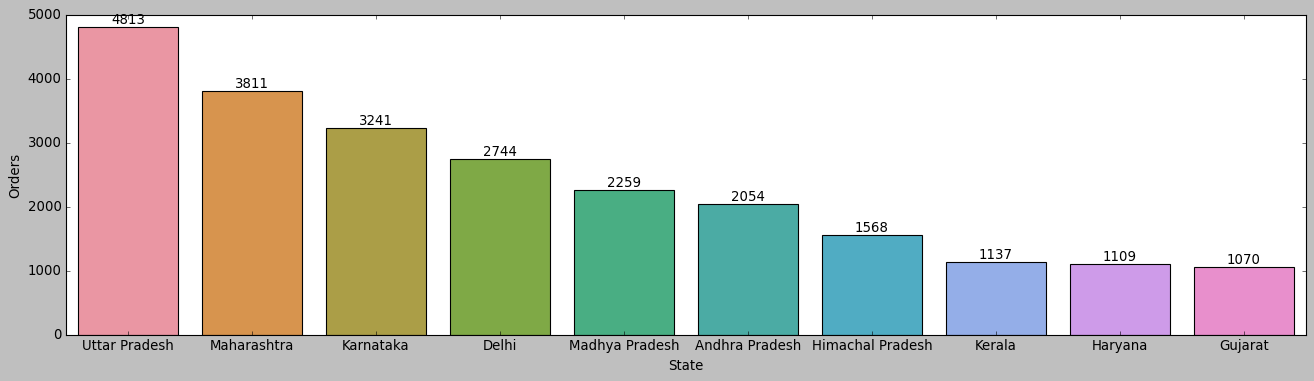

In [24]:
plt.style.use('classic') # style of the graph
plt.figure(figsize=(20,5)) #size of the graph
ax=sns.barplot(x="State",y="Orders",data=state_order) #making bar plot
plt.bar_label(ax.containers[0])
plt.show()

In [25]:
#  Top 10 states with highest sales

state_sale=sales_data.groupby(by=["State"])["Amount"].sum().sort_values(ascending=False).head(10).reset_index()

state_sale

,State,Amount
0,Uttar Pradesh,19374968.00
1,Maharashtra,14427543.00
2,Karnataka,13523540.00
3,Delhi,11603819.45
4,Madhya Pradesh,8101142.00
5,Andhra Pradesh,8037146.99
6,Himachal Pradesh,4963368.00
7,Haryana,4220175.00
8,Bihar,4022757.00
9,Gujarat,3946082.00


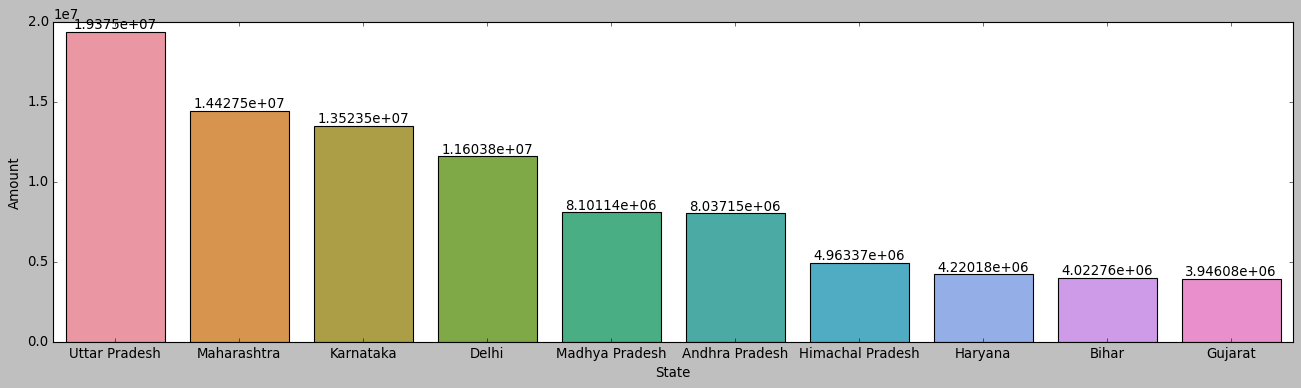

In [26]:
plt.figure(figsize=(20,5))
ax=sns.barplot(x="State",y="Amount",data=state_sale)
plt.bar_label(ax.containers[0])
plt.show()

From the above two states graphs we can conclude that Uttap Pradesh, Maharashtra and Karnatka re the top 3 states with maximum orders and sales

### Shaadi Status

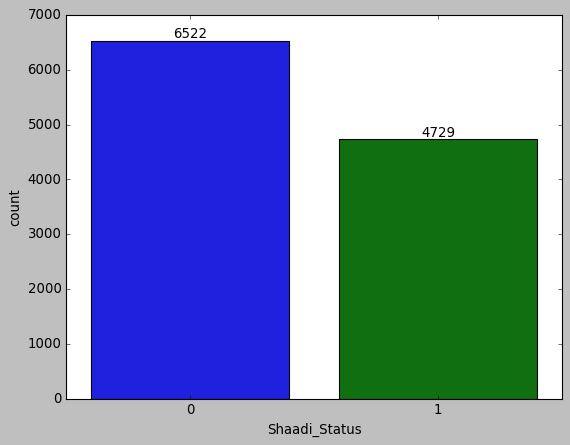

In [30]:
# Shaadi status of our customers

ax=sns.countplot(x="Shaadi_Status",data=sales_data)
plt.bar_label(ax.containers[0])
plt.show()

In [31]:
# Total sales of each shaadi Status of both gender
marital_sales=sales_data.groupby(by=["Shaadi_Status","Gender"])["Amount"].sum().reset_index()

marital_sales

,Shaadi_Status,Gender,Amount
0,0,F,43786648.44
1,0,M,18338738.00
2,1,F,30549207.99
3,1,M,13574538.00


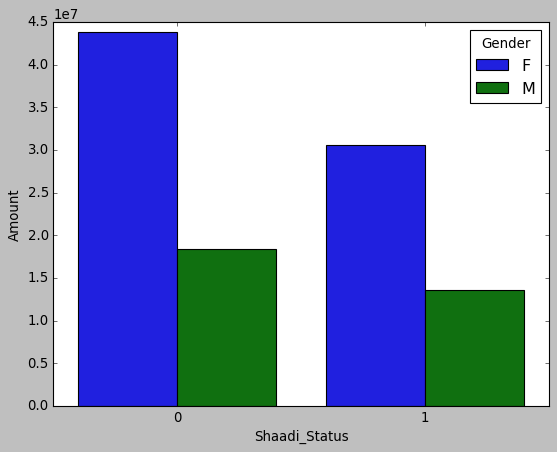

In [33]:
sns.barplot(x="Shaadi_Status",y="Amount",data=marital_sales,hue="Gender")
plt.show()

From the above two 'Shaadi_Status'graph, we can conclude that majority of our customers are married females

### Occupation

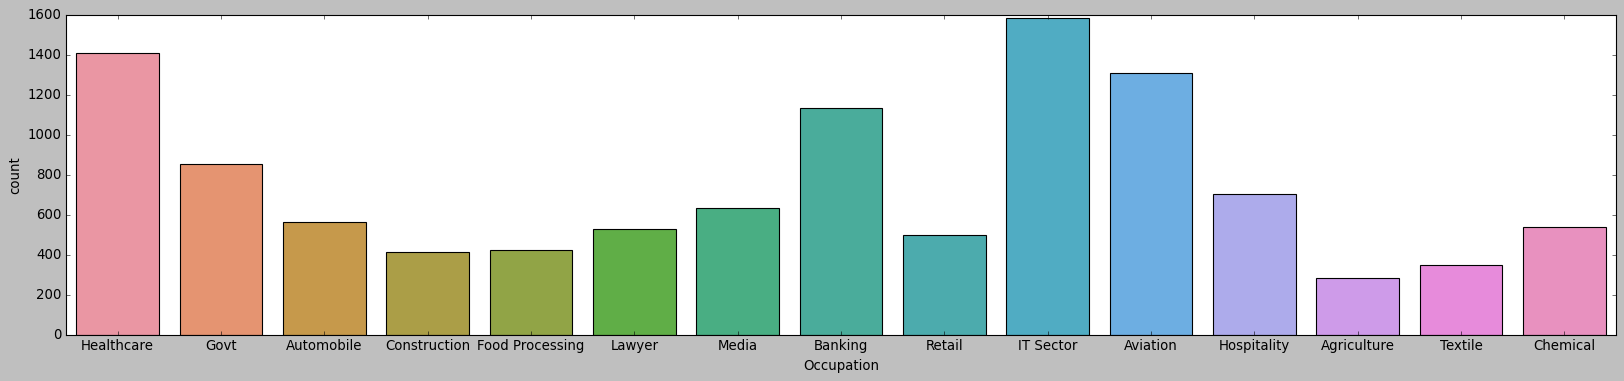

In [222]:
# Occupation of our customers

plt.figure(figsize=(25,5))
sns.countplot(x="Occupation",data=sales_data)
plt.show()

In [277]:
# Top 7 occcupation has highest purchasing power

occupation_sales=sales_data.groupby(by=["Occupation"])["Amount"].sum().sort_values(ascending=False).head(7).reset_index()

occupation_sales

,Occupation,Amount
0,IT Sector,14755079
1,Healthcare,13034586
2,Aviation,12602298
3,Banking,10770610
4,Govt,8517212
5,Hospitality,6376405
6,Media,6295832


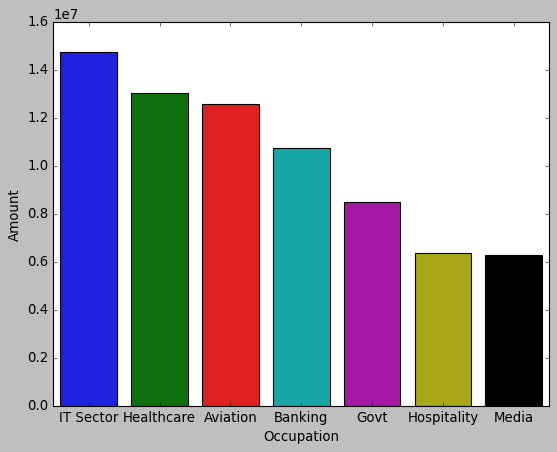

In [230]:
sns.barplot(x="Occupation",y="Amount",data=occupation_sales)
plt.show()

From the above two occupation graphs we can conclude that most of our buyers who has highest purchasing power are from IT sector, Healthcare amd Aviation sector

### Product Category

In [35]:
# Top7 product category has maximum orders

product_orders=sales_data.groupby(by=["Product_Category"])["Orders"].sum().sort_values(ascending=False).head(7).reset_index()

product_orders

,Product_Category,Orders
0,Clothing & Apparel,6634
1,Food,6120
2,Electronics & Gadgets,5226
3,Footwear & Shoes,2654
4,Household items,1331
5,Beauty,1086
6,Games & Toys,940


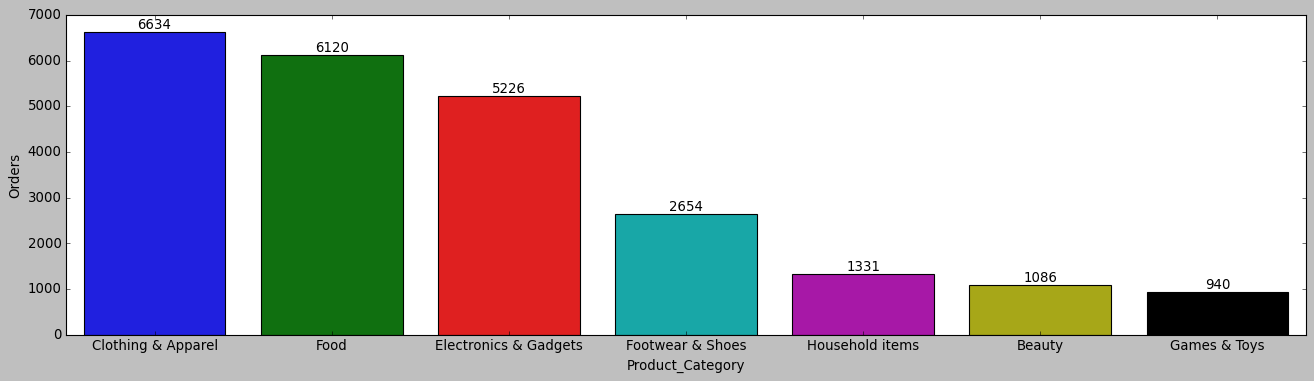

In [36]:
plt.figure(figsize=(20,5))
ax=sns.barplot(x="Product_Category",y="Orders",data=product_orders)
plt.bar_label(ax.containers[0])
plt.show()

In [280]:
# Top 7 product category has maximum sales

product_sales=sales_data.groupby(by=["Product_Category"])["Amount"].sum().sort_values(ascending=False).head(7).reset_index()

product_sales

,Product_Category,Amount
0,Food,33933883
1,Clothing & Apparel,16495019
2,Electronics & Gadgets,15643846
3,Footwear & Shoes,15575209
4,Furniture,5440051
5,Games & Toys,4331694
6,Sports Products,3635933


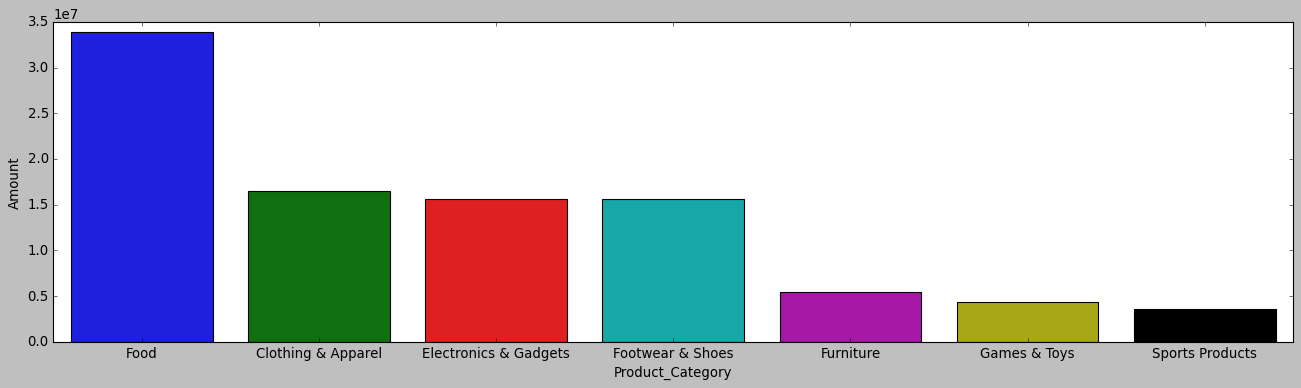

In [281]:
plt.figure(figsize=(20,5))
sns.barplot(x="Product_Category",y="Amount",data=product_sales)
plt.show()

From the above product category graphs we can conclude that most of sold products with highest sales are food, clothing and electronics

## Final Insight

Most of our customer are- 

Married women between age group 26 to 30 yrs

From states like Maharahtra, UP and Karnataka

Working in sectors like IT, healthcare and aviation

More likely to buy products like clothes, food electronics from us

## Project learnings

In [ ]:
Performed data cleaning and manipulation

Performed exploratory data analysis (EDA) using
pandas, matplotlib and seaborn libraries

Improved customer experience by identifying
potential customers across different states,
occupation, gender and age groups

Improved sales by identifying most selling
product categories and products, which can help
to plan inventory and hence meet the demands.
